# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

# import sympy as sym

# import matplotlib_inline.backend_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [3]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):

  return 2*x - 2*np.pi*np.sin(2*np.pi*x)

In [12]:
deriv(0)

np.float64(0.0)

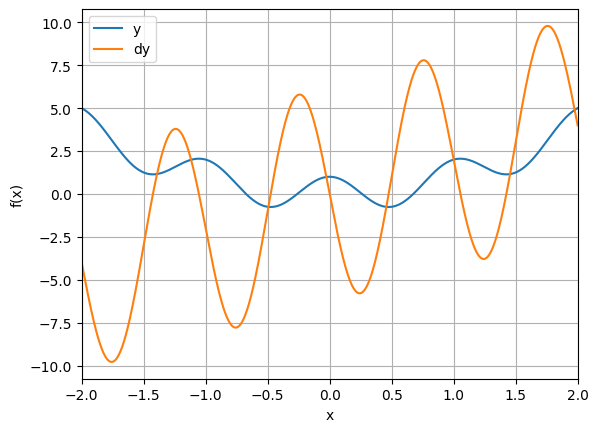

In [13]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [16]:
# random starting point
# localmin = np.random.choice(x,1)
localmin = np.array([0])
print(localmin)

# learning parameters
learning_rate = .001
training_epochs = 100000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[0]


array([0.])

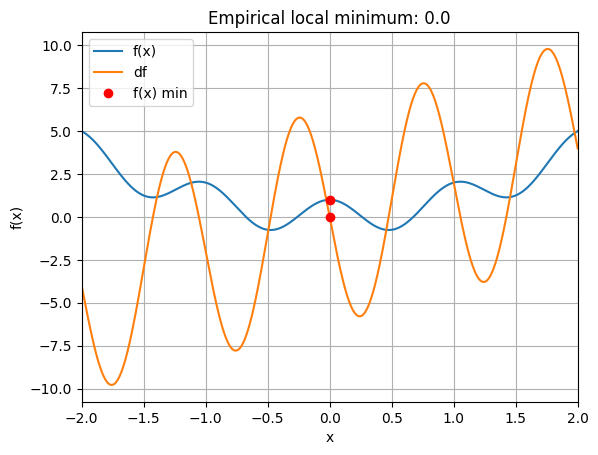

In [17]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [18]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
# threshold = 0.1 # Define the threshold
training_epochs = 1000 # We will now stop based on the threshold

# run through training and store all the results
modelparams = [] # Use a list to store parameters as the number of iterations is now variable

for i in range(10000): # Set a reasonable upper limit for iterations to prevent infinite loops
  grad = deriv(localmin)
  modelparams.append([localmin[0], grad[0]]) # Append to the list
  localmin = localmin - learning_rate*grad

  # if np.abs(grad) < threshold: # Check if the absolute value of the derivative is below the threshold
  #   print(f"Training stopped after {i+1} iterations as the derivative ({grad[0]:.5f}) is below the threshold ({threshold}).")
  #   break # Stop the loop

modelparams = np.array(modelparams) # Convert the list to a numpy array after the loop

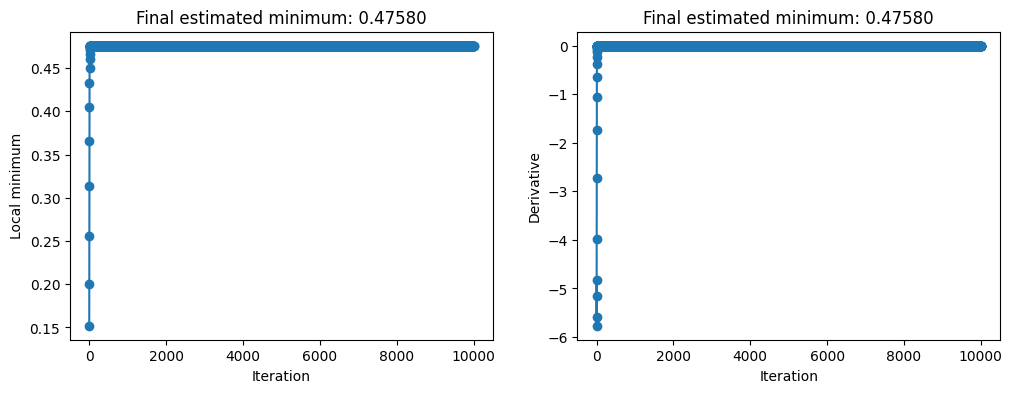

In [11]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [23]:
np.where(modelparams[0,1]==0)

/tmp/ipython-input-1215026867.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where(modelparams[0,1]==0)


(array([], dtype=int64),)

# Additional explorations

In [10]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
#
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
#
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative
#    instead of a specified number of training epochs?
#

In [24]:
zero_deriv_row = np.where(modelparams[:, 1] == 0)
print("Row(s) where the derivative is 0:", zero_deriv_row)

Row(s) where the derivative is 0: (array([], dtype=int64),)
